In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
energies = np.load("output/energies.npy")
H = np.load("output/hamiltonian.npy")
gamma_L = np.load("output/gamma_L.npy")
gamma_R = np.load("output/gamma_R.npy")
sigma_D = np.load("output/ed/self_energy.npy")

In [82]:
print("Hamiltonian:\n", H)
eigvals, eigvecs = np.linalg.eig(H)
print("Eigenvalues:", eigvals)

Hamiltonian:
 [[-0.5   0.5   0.  ]
 [ 0.5   0.25  0.5 ]
 [ 0.    0.5   0.5 ]]
Eigenvalues: [-0.7938861   0.08183183  0.96205427]


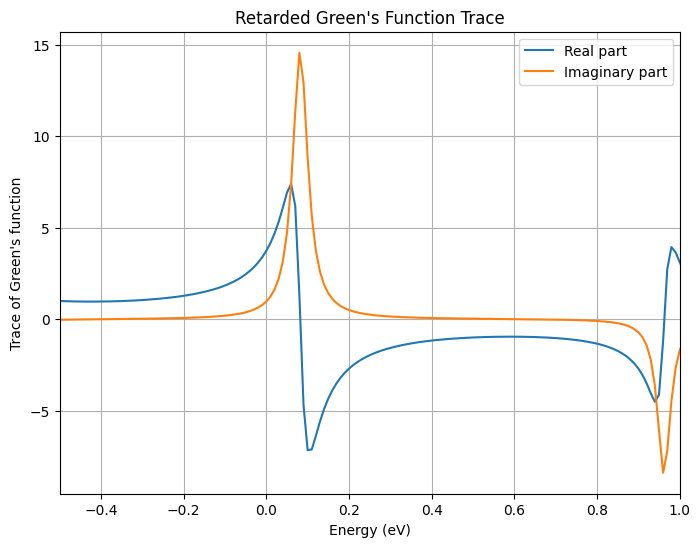

In [83]:
data = np.load("output/dft/G_retarded.npz")
E_G = data["energies"]
G = data["G"]  # shape: (nE, n, n) complex
idx_l, idx_r = 0, 2
G_lr = G[:,idx_l,idx_r]

plt.figure(figsize=(8, 6))
plt.plot(E_G, G_lr.real, label="Real part")
plt.plot(E_G, G_lr.imag, label="Imaginary part")
plt.xlabel("Energy (eV)")
plt.ylabel("Trace of Green's function")
plt.title("Retarded Green's Function Trace")
plt.xlim(-0.5,1.0)
plt.legend()
plt.grid()
plt.show()

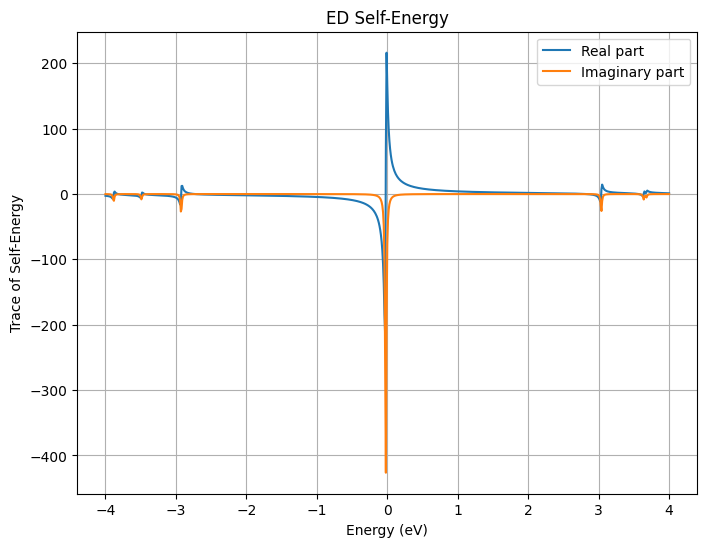

In [84]:
energies = np.load("output/energies.npy")
se = np.load("output/ed/self_energy.npy")
se_trace = np.trace(se, axis1=1, axis2=2)
plt.figure(figsize=(8, 6))
plt.plot(energies,se_trace.real, label="Real part")
plt.plot(energies,se_trace.imag, label="Imaginary part")
plt.xlabel("Energy (eV)")
plt.ylabel("Trace of Self-Energy")
plt.title("ED Self-Energy")
plt.legend()
plt.grid()
# plt.xlim(-1.0, 1.23)
plt.show()

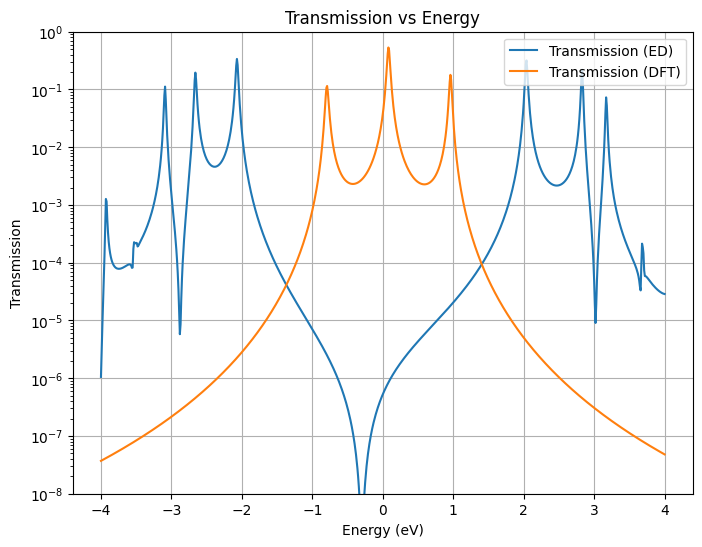

In [85]:
E,T = np.load("output/ed/ET.npy")
E_dft, T_dft = np.load("output/dft/ET.npy")
plt.figure(figsize=(8, 6))
plt.plot(E,T, label="Transmission (ED)")
plt.plot(E_dft,T_dft, label="Transmission (DFT)")
plt.xlabel("Energy (eV)")
plt.ylabel("Transmission")
plt.title("Transmission vs Energy")
plt.legend()
plt.grid()
plt.ylim(1e-8, 1.0)
plt.yscale("log")